In [1]:
import os
import errno
import numpy as np 
import deepcell
from deepcell_toolbox.processing import phase_preprocess
from deepcell.applications import MultiplexSegmentation

In [2]:
from skimage.exposure import rescale_intensity
from skimage.segmentation import find_boundaries
import copy
def make_color_overlay(input_data):
    """Create a color overlay from 2 channel image data
    
    Args:
        input_data: stack of input images
    
    Returns:
        numpy.array: color-adjusted stack of overlays in RGB mode
    """
    RGB_data = np.zeros(input_data.shape[:3] + (3, ), dtype='float32')
    
    # rescale channels to aid plotting
    for img in range(input_data.shape[0]):
        for channel in range(input_data.shape[-1]):
            # get histogram for non-zero pixels
            percentiles = np.percentile(input_data[img, :, :, channel][input_data[img, :, :, channel] > 0],
                                            [5, 95])
            rescaled_intensity = rescale_intensity(input_data[img, :, :, channel],
                                                       in_range=(percentiles[0], percentiles[1]),
                                                       out_range='float32')
            RGB_data[img, :, :, channel + 1] = rescaled_intensity
        
    # create a blank array for red channel
    return RGB_data

def make_outline_overlay(RGB_data, predictions):
    boundaries = np.zeros_like(predictions)
    overlay_data = copy.copy(RGB_data)
    
    for img in range(predictions.shape[0]):
        boundary = find_boundaries(predictions[img, :, :], connectivity=1, mode='inner')
        boundaries[img, boundary > 0] = 1

    overlay_data[boundaries > 0, :] = 1
    
    return overlay_data

In [3]:
# create psuedo labels
app = MultiplexSegmentation(use_pretrained_weights=False)
weights = "/data/models/20200619_production_updates/20200816_all_data_normalized_512x512_compartment_deep_watershed.h5"
app.model.load_weights(weights)

In [20]:
original_data = np.load('/data/npz_data/20200819_multiplex_normalized_512x512_test.npz')
X_data, y_data_cell = original_data['X'], original_data['y']
print(X_data.shape, X_data.dtype, y_data_cell.shape, y_data_cell.dtype)

(148, 512, 512, 2) float64 (148, 512, 512, 1) float64


In [21]:
predictions = app.predict(X_data, compartment='nuclear',
                           postprocess_kwargs_nuclear={'interior_threshold': 0.6,
                                                         'interior_model_smooth': 0,
                                                         'maxima_model_smooth': 0,
                                                         'maxima_threshold': 0.1})

In [12]:
RGB_data = make_color_overlay(X_data[:10])

In [41]:
predicted_overlay = make_outline_overlay(RGB_data[:10], predictions3[:10, ..., 0])

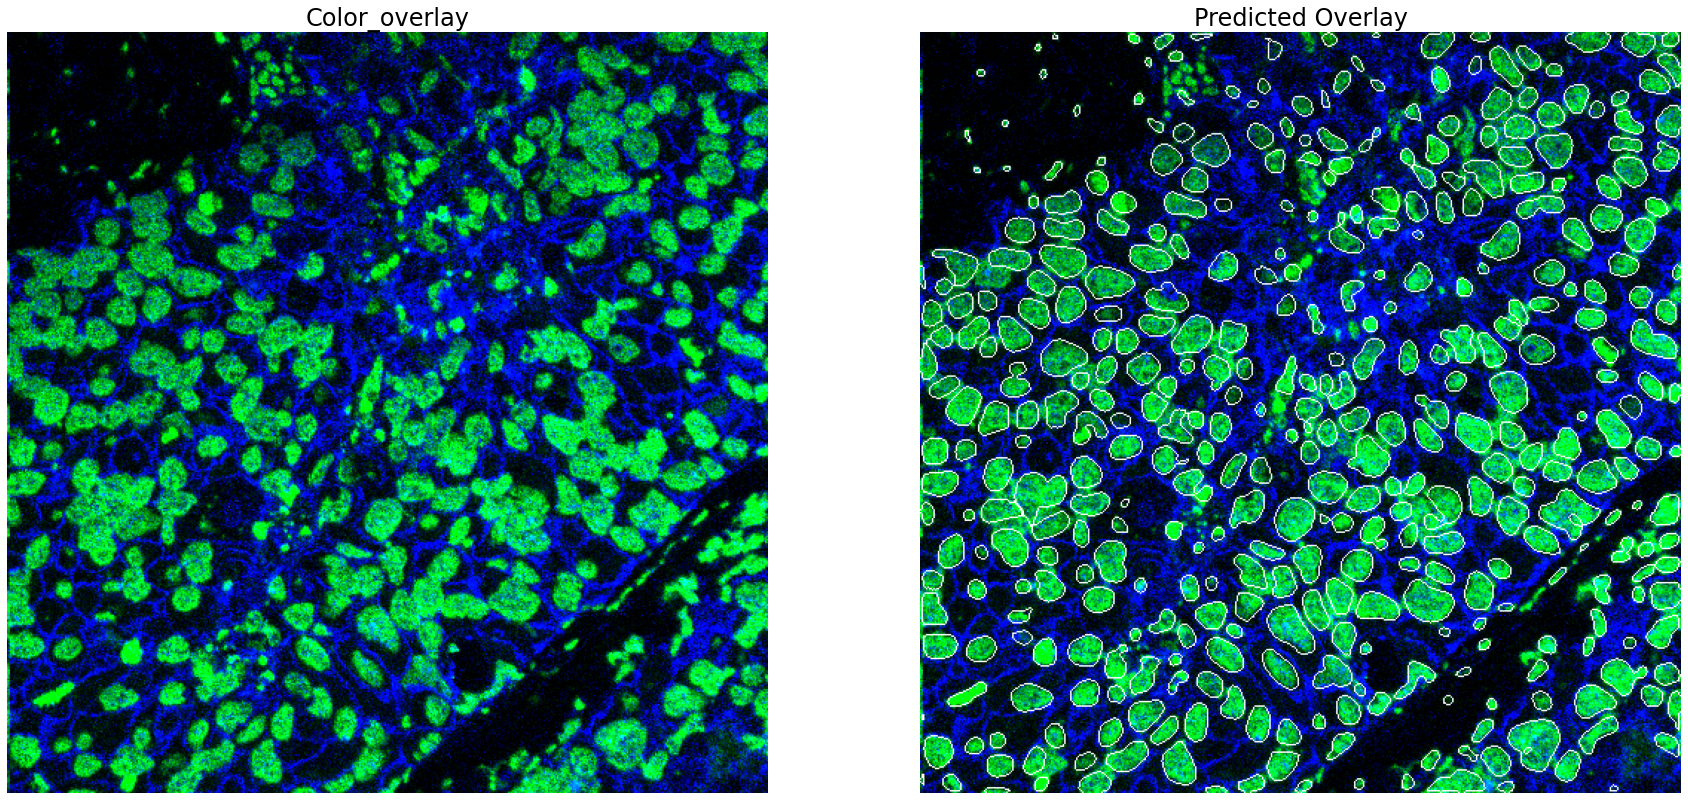

In [42]:
import matplotlib.pyplot as plt
cmap = plt.get_cmap('viridis')
cmap.set_bad('black')
index = [8]
fig, axes = plt.subplots(1,2,figsize=(30,20))

axes = axes.flatten()
axes[0].imshow(RGB_data[index[0],...])
axes[1].imshow(predicted_overlay[index[0], ...], cmap=cmap)

axes[0].set_title('Color_overlay', fontsize=24)
axes[1].set_title('Predicted Overlay', fontsize=24)
# axes[5].set_title('Ground Truth Mask', fontsize=24)

for ax in axes.flatten():
    ax.set_axis_off()

In [10]:
predictions = np.concatenate((predictions1, predictions2, predictions3), axis=0)
                             #predictions4, predictions5, predictions6, predictions7), axis=0)

(1032, 512, 512, 1)

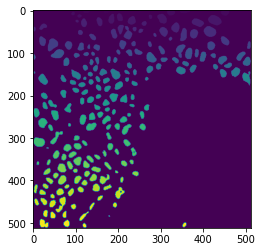

In [13]:
import matplotlib.pyplot as plt
plt.imshow(predictions[400, :, :, 0])
predictions.shape

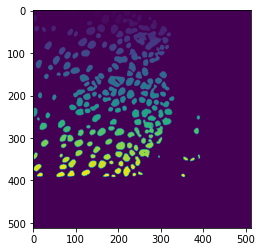

In [20]:
import matplotlib.pyplot as plt
plt.imshow(nuclear_predictions[1404, :, :, 0].astype('float32'))

In [16]:
# # set non-nuclear pixels to zero
# nuclear_predictions = np.copy(y_data_cell)
# for i in range(nuclear_predictions.shape[0]):
#     zero_mask = predictions[i, :, :, 0] == 0
#     nuclear_predictions[i, zero_mask, 0] = 0

In [17]:
# # relabel objects
# from skimage.measure import label
# for i in range(nuclear_predictions.shape[0]):
#     nuclear_predictions[i, ..., 0] = label(nuclear_predictions[i, ..., 0])

In [18]:
# # from stray pixels
# from skimage.morphology import remove_small_objects
# for i in range(nuclear_predictions.shape[0]):
#     nuclear_predictions[i, ..., 0] = remove_small_objects(nuclear_predictions[i, ..., 0],
#                                                          min_size=6)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?
  """


In [22]:
np.savez_compressed('/data/npz_data/20200819_multiplex_normalized_512x512_compartment_test.npz', 
         X=X_data, 
         y=np.concatenate((y_data_cell, predictions), axis=-1))

In [11]:
# create folder for this set of experiments
experiment_folder = "20200619_production_updates"
MODEL_DIR = os.path.join("/data/models", experiment_folder)
NPZ_DIR = "/data/npz_data/"
LOG_DIR = '/data/logs'

if not os.path.isdir(MODEL_DIR):
    os.makedirs(MODEL_DIR)

In [2]:
from deepcell.utils.data_utils import get_data
from skimage.segmentation import relabel_sequential

npz_name = "20200819_multiplex_normalized_512x512_compartment"

test_size=0.1
seed=0
# DATA_FILE = NPZ_DIR + npz_name + ".npz"
# train_dict = np.load(NPZ_DIR + "20200819_multiplex_normalized_512x512_compartment.npz")
# val_dict = np.load(NPZ_DIR + "20200819_multiplex_normalized_512x512_compartment_val.npz")
# test_dict = np.load(NPZ_DIR + "20200819_multiplex_normalized_512x512_compartment_test.npz")
# X_train, y_train = train_dict['X'], train_dict['y']
# X_val, y_val = val_dict['X'], val_dict['y']

X.shape: (1032, 512, 512, 2)
y.shape: (1032, 512, 512, 2)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185

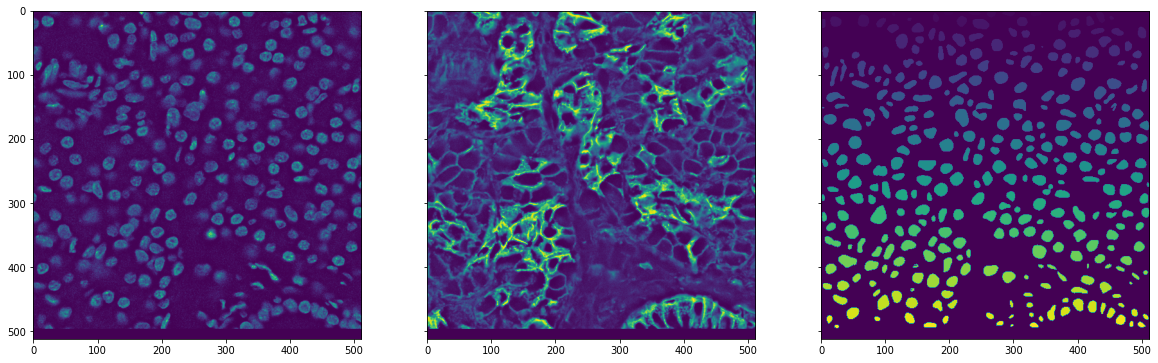

In [4]:
print('X.shape: {}\ny.shape: {}'.format(X_train.shape, y_train.shape))
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(20, 20), sharex=True, sharey=True)

idx = 103
axes[0].imshow(X_train[idx,:,:,0].astype('float32'))
axes[1].imshow(X_train[idx,:,:,1].astype('float32'))
axes[2].imshow(y_train[idx,:,:,1])
print(np.unique(y_train[idx]))

In [5]:
k=128
X_train = phase_preprocess(X_train, k)
X_val = phase_preprocess(X_val, k)

In [6]:
from deepcell.model_zoo.panopticnet import PanopticNet

new_model = PanopticNet(
    backbone='resnet50',
    input_shape=(256, 256, 2),
    norm_method=None,
    num_semantic_heads=8,
    num_semantic_classes=[1, 1, 2, 3, 1, 1, 2, 3], # inner distance, outer distance, fgbg, pixelwise
    location=True,  # should always be true
    include_top=True)

W0820 04:07:32.448526 140321974994752 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [3]:
from tensorflow.keras.optimizers import SGD, Adam
from deepcell.utils.train_utils import rate_scheduler

model_name = npz_name + '_deep_watershed'

n_epoch = 35  # Number of training epochs

optimizer = Adam(lr=1e-4, clipnorm=0.001)
lr_sched = rate_scheduler(lr=1e-4, decay=0.99)

batch_size = 8

min_objects = 20  # throw out images with fewer than this many objects
seed=0
model_name

'20200819_multiplex_normalized_512x512_compartment_deep_watershed'

In [8]:
from deepcell import image_generators
from deepcell.utils import train_utils


# use augmentation for training but not validation
datagen = image_generators.CroppingDataGenerator(
    rotation_range=180,
    shear_range=0,
    zoom_range=(0.75, 1.25),
    horizontal_flip=True,
    vertical_flip=True,
    crop_size=(256, 256))

datagen_val = image_generators.CroppingDataGenerator(
    rotation_range=0,
    shear_range=0,
    zoom_range=0,
    horizontal_flip=0,
    vertical_flip=0,
    crop_size=(256, 256))
    
train_data = datagen.flow(
    {'X': X_train, 'y': y_train},
    seed=seed,
    transforms=['inner-distance', 'watershed-cont', 'fgbg', 'pixelwise'],
    transforms_kwargs={'watershed-cont': {'erosion_width': 1}, 'pixelwise':{'dilation_radius': 1}, 
                      'inner-distance': {'erosion_width': 1, 'alpha': 'auto'}},
    min_objects=min_objects,
    batch_size=batch_size)

val_data = datagen_val.flow(
    {'X': X_val, 'y': y_val},
    seed=seed,
    transforms=['inner-distance', 'watershed-cont', 'fgbg', 'pixelwise'],
    transforms_kwargs={'watershed-cont': {'erosion_width': 1}, 'pixelwise':{'dilation_radius': 1},
                      'inner-distance': {'erosion_width': 1, 'alpha': 'auto'}},
    min_objects=min_objects,
    batch_size=batch_size)

W0820 04:16:29.326176 140321974994752 semantic.py:158] Removing 101 of 1032 images with fewer than 20 objects.
W0820 04:17:50.573396 140321974994752 semantic.py:158] Removing 19 of 157 images with fewer than 20 objects.


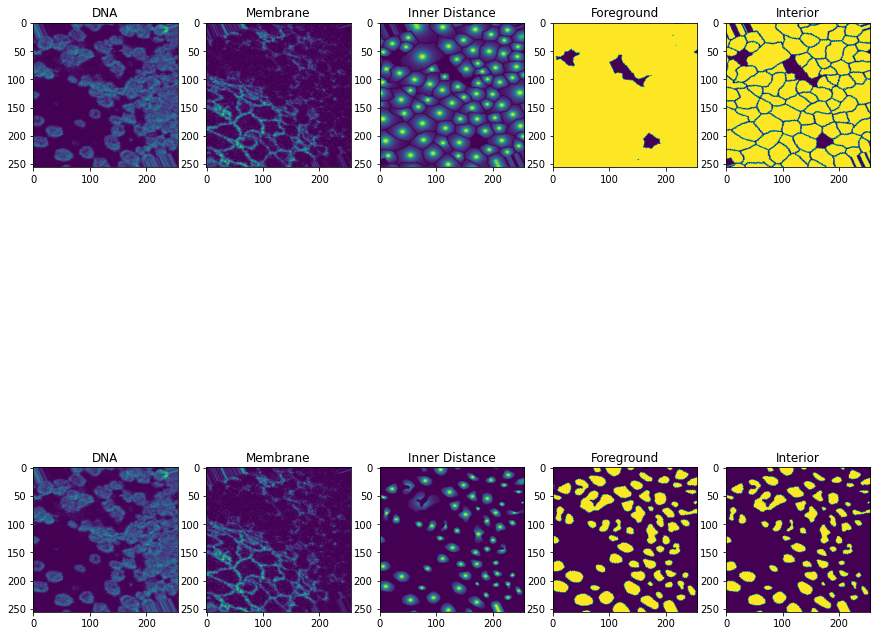

In [9]:
from matplotlib import pyplot as plt

inputs, outputs = train_data.next()

img = inputs[0]
inner_distance = outputs[0]
outer_distance = outputs[1]
fgbg = outputs[2]
pixelwise = outputs[3]

inner_distance_nuc = outputs[4]
outer_distance_nuc = outputs[5]
fgbg_nuc = outputs[6]
pixelwise_nuc = outputs[7]

fig, axes = plt.subplots(2, 5, figsize=(15, 15))

axes[0, 0].imshow(img[:, :, 0])
axes[0, 0].set_title('DNA')

axes[0, 1].imshow(img[:, :, 1])
axes[0, 1].set_title('Membrane')

axes[0, 2].imshow(inner_distance[0, ..., 0])
axes[0, 2].set_title('Inner Distance')

axes[0, 3].imshow(fgbg[0, ..., 1])
axes[0, 3].set_title('Foreground')

axes[0, 4].imshow(pixelwise[0, ..., 1])
axes[0, 4].set_title('Interior')

# nuclear
axes[1, 0].imshow(img[:, :, 0])
axes[1, 0].set_title('DNA')

axes[1, 1].imshow(img[:, :, 1])
axes[1, 1].set_title('Membrane')

axes[1, 2].imshow(inner_distance_nuc[0, ..., 0])
axes[1, 2].set_title('Inner Distance')

axes[1, 3].imshow(fgbg_nuc[0, ..., 1])
axes[1, 3].set_title('Foreground')

axes[1, 4].imshow(pixelwise_nuc[0, ..., 1])
axes[1, 4].set_title('Interior')

plt.show()

In [10]:
# Create a dictionary of losses for each semantic head
from tensorflow.python.keras.losses import MSE
from deepcell import losses


def semantic_loss(n_classes):
    def _semantic_loss(y_pred, y_true):
        if n_classes > 1:
            return 0.01 * losses.weighted_categorical_crossentropy(
                y_pred, y_true, n_classes=n_classes)
        return MSE(y_pred, y_true)
    return _semantic_loss


loss = {}

# Give losses for all of the semantic heads
for layer in new_model.layers:
    if layer.name.startswith('semantic_'):
        n_classes = layer.output_shape[-1]
        loss[layer.name] = semantic_loss(n_classes)

In [11]:
new_model.compile(loss=loss, optimizer=optimizer)

In [12]:
from deepcell.utils.train_utils import get_callbacks
from deepcell.utils.train_utils import count_gpus


model_path = os.path.join(MODEL_DIR, '{}.h5'.format(model_name))
loss_path = os.path.join(MODEL_DIR, '{}.npz'.format(model_name))

num_gpus = count_gpus()

print('Training on', num_gpus, 'GPUs.')

train_callbacks = get_callbacks(
    model_path,
    lr_sched=lr_sched,
    tensorboard_log_dir=LOG_DIR,
    save_weights_only=num_gpus >= 2,
    monitor='val_loss',
    verbose=1)

loss_history = new_model.fit_generator(
    train_data,
    steps_per_epoch=train_data.y.shape[0] // batch_size,
    epochs=n_epoch,
    validation_data=val_data,
    validation_steps=val_data.y.shape[0] // batch_size,
    callbacks=train_callbacks)

Training on 1 GPUs.
Epoch 1/35


W0820 04:21:03.706866 140321974994752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


115/116 [============================>.] - ETA: 0s - loss: 0.2180 - semantic_0_loss: 0.0396 - semantic_1_loss: 0.0920 - semantic_2_loss: 0.0040 - semantic_3_loss: 0.0083 - semantic_4_loss: 0.0424 - semantic_5_loss: 0.0171 - semantic_6_loss: 0.0050 - semantic_7_loss: 0.0096
Epoch 00001: val_loss improved from inf to 0.28216, saving model to /data/models/20200619_production_updates/20200819_multiplex_normalized_512x512_compartment_deep_watershed.h5
116/116 [==============================] - 176s 2s/step - loss: 0.2169 - semantic_0_loss: 0.0394 - semantic_1_loss: 0.0915 - semantic_2_loss: 0.0040 - semantic_3_loss: 0.0083 - semantic_4_loss: 0.0421 - semantic_5_loss: 0.0171 - semantic_6_loss: 0.0050 - semantic_7_loss: 0.0096 - val_loss: 0.2822 - val_semantic_0_loss: 0.0403 - val_semantic_1_loss: 0.0963 - val_semantic_2_loss: 0.0252 - val_semantic_3_loss: 0.0394 - val_semantic_4_loss: 0.0164 - val_semantic_5_loss: 0.0242 - val_semantic_6_loss: 0.0206 - val_semantic_7_loss: 0.0198
Epoch 2/35


116/116 [==============================] - 68s 582ms/step - loss: 0.0572 - semantic_0_loss: 0.0137 - semantic_1_loss: 0.0219 - semantic_2_loss: 0.0022 - semantic_3_loss: 0.0054 - semantic_4_loss: 0.0039 - semantic_5_loss: 0.0050 - semantic_6_loss: 0.0013 - semantic_7_loss: 0.0038 - val_loss: 0.0566 - val_semantic_0_loss: 0.0129 - val_semantic_1_loss: 0.0216 - val_semantic_2_loss: 0.0023 - val_semantic_3_loss: 0.0053 - val_semantic_4_loss: 0.0038 - val_semantic_5_loss: 0.0051 - val_semantic_6_loss: 0.0014 - val_semantic_7_loss: 0.0041
Epoch 10/35
115/116 [============================>.] - ETA: 0s - loss: 0.0541 - semantic_0_loss: 0.0130 - semantic_1_loss: 0.0206 - semantic_2_loss: 0.0021 - semantic_3_loss: 0.0052 - semantic_4_loss: 0.0036 - semantic_5_loss: 0.0047 - semantic_6_loss: 0.0012 - semantic_7_loss: 0.0037
Epoch 00010: val_loss improved from 0.05655 to 0.05365, saving model to /data/models/20200619_production_updates/20200819_multiplex_normalized_512x512_compartment_deep_waters

Epoch 18/35
115/116 [============================>.] - ETA: 0s - loss: 0.0491 - semantic_0_loss: 0.0119 - semantic_1_loss: 0.0188 - semantic_2_loss: 0.0020 - semantic_3_loss: 0.0050 - semantic_4_loss: 0.0031 - semantic_5_loss: 0.0039 - semantic_6_loss: 0.0010 - semantic_7_loss: 0.0033
Epoch 00018: val_loss did not improve from 0.04638
116/116 [==============================] - 63s 547ms/step - loss: 0.0490 - semantic_0_loss: 0.0119 - semantic_1_loss: 0.0188 - semantic_2_loss: 0.0020 - semantic_3_loss: 0.0050 - semantic_4_loss: 0.0031 - semantic_5_loss: 0.0039 - semantic_6_loss: 0.0010 - semantic_7_loss: 0.0033 - val_loss: 0.0475 - val_semantic_0_loss: 0.0114 - val_semantic_1_loss: 0.0190 - val_semantic_2_loss: 0.0021 - val_semantic_3_loss: 0.0050 - val_semantic_4_loss: 0.0026 - val_semantic_5_loss: 0.0033 - val_semantic_6_loss: 9.7613e-04 - val_semantic_7_loss: 0.0031
Epoch 19/35
115/116 [============================>.] - ETA: 0s - loss: 0.0506 - semantic_0_loss: 0.0123 - semantic_1_lo

Epoch 27/35
115/116 [============================>.] - ETA: 0s - loss: 0.0482 - semantic_0_loss: 0.0118 - semantic_1_loss: 0.0188 - semantic_2_loss: 0.0020 - semantic_3_loss: 0.0050 - semantic_4_loss: 0.0028 - semantic_5_loss: 0.0036 - semantic_6_loss: 9.6538e-04 - semantic_7_loss: 0.0031
Epoch 00027: val_loss improved from 0.04555 to 0.04383, saving model to /data/models/20200619_production_updates/20200819_multiplex_normalized_512x512_compartment_deep_watershed.h5
116/116 [==============================] - 68s 586ms/step - loss: 0.0482 - semantic_0_loss: 0.0118 - semantic_1_loss: 0.0188 - semantic_2_loss: 0.0020 - semantic_3_loss: 0.0050 - semantic_4_loss: 0.0028 - semantic_5_loss: 0.0036 - semantic_6_loss: 9.6800e-04 - semantic_7_loss: 0.0031 - val_loss: 0.0438 - val_semantic_0_loss: 0.0109 - val_semantic_1_loss: 0.0177 - val_semantic_2_loss: 0.0020 - val_semantic_3_loss: 0.0048 - val_semantic_4_loss: 0.0023 - val_semantic_5_loss: 0.0028 - val_semantic_6_loss: 7.6416e-04 - val_seman

In [12]:
from deepcell.applications import MultiplexSegmentation
app = MultiplexSegmentation(use_pretrained_weights=False)
app.model.load_weights(os.path.join(MODEL_DIR, model_name + '.h5'))

In [6]:
test_dict = np.load('/data/npz_data/20200819_multiplex_normalized_512x512_compartment_test.npz')
X_test, y_test = test_dict['X'], test_dict['y']

In [7]:
X_test = phase_preprocess(X_test, 128)

In [13]:
# labeled_images = app.predict(X_val[:40], postprocess_kwargs_whole_cell={'maxima_threshold': 0.05, 
#                                                                        'maxima_model_smooth': 0,
#                                                                        'interior_model_smooth': 2})
labeled_images = app.predict(X_test, postprocess_kwargs_whole_cell={'maxima_threshold':0.02, 'maxima_model_smooth':0,
                                    'interior_threshold':0.3,
                                    'radius':5,
                                    'small_objects_threshold':10,
                                     'fill_holes_threshold':10})

In [33]:
from skimage.exposure import rescale_intensity
from skimage.segmentation import find_boundaries
import copy
def make_color_overlay(input_data):
    """Create a color overlay from 2 channel image data
    
    Args:
        input_data: stack of input images
    
    Returns:
        numpy.array: color-adjusted stack of overlays in RGB mode
    """
    RGB_data = np.zeros(input_data.shape[:3] + (3, ), dtype='float32')
    
    # rescale channels to aid plotting
    for img in range(input_data.shape[0]):
        for channel in range(input_data.shape[-1]):
            # get histogram for non-zero pixels
            percentiles = np.percentile(input_data[img, :, :, channel][input_data[img, :, :, channel] > 0],
                                            [5, 95])
            rescaled_intensity = rescale_intensity(input_data[img, :, :, channel],
                                                       in_range=(percentiles[0], percentiles[1]),
                                                       out_range='float32')
            RGB_data[img, :, :, channel + 1] = rescaled_intensity
        
    # create a blank array for red channel
    return RGB_data

def make_outline_overlay(RGB_data, predictions):
    boundaries = np.zeros_like(predictions)
    overlay_data = copy.copy(RGB_data)
    
    for img in range(predictions.shape[0]):
        boundary = find_boundaries(predictions[img, :, :], connectivity=1, mode='inner')
        boundaries[img, boundary > 0] = 1

    overlay_data[boundaries > 0, :] = 1
    
    return overlay_data

In [34]:
RGB_data = make_color_overlay(X_val)
true_overlay = make_outline_overlay(RGB_data, y_val[..., 0])

In [52]:
predicted_overlay = make_outline_overlay(RGB_data[:40], labeled_images[..., 0])

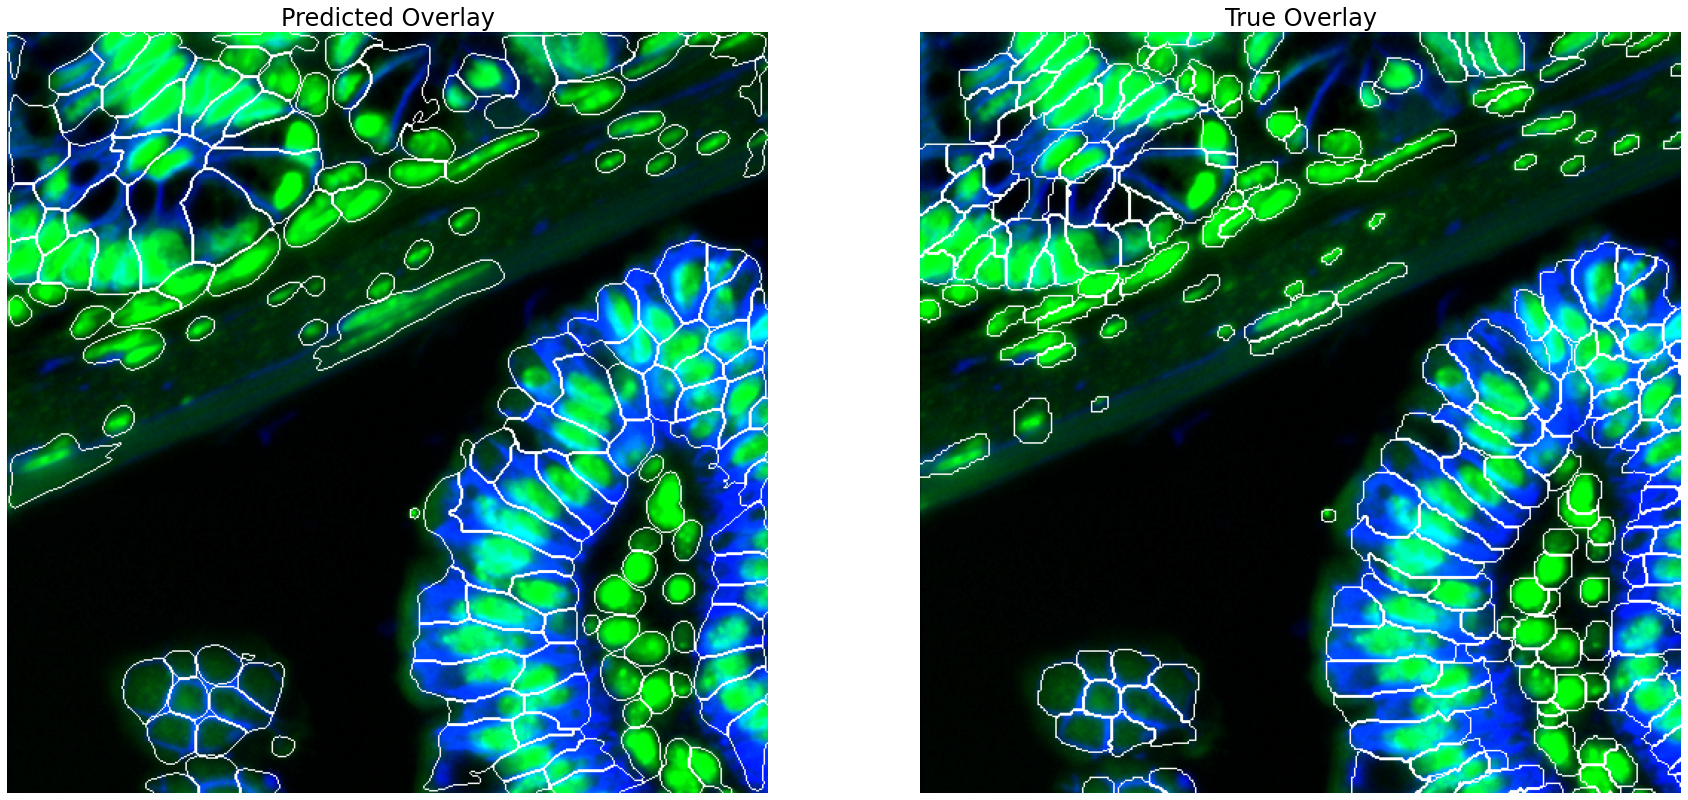

In [56]:
cmap = plt.get_cmap('viridis')
cmap.set_bad('black')
index = [27]
fig, axes = plt.subplots(1,2,figsize=(30,20))

axes = axes.flatten()
axes[0].imshow(predicted_overlay[index[0], ...], cmap=cmap)
axes[1].imshow(true_overlay[index[0], ...], cmap=cmap)

axes[0].set_title('Predicted Overlay', fontsize=24)
axes[1].set_title('True Overlay', fontsize=24)
# axes[5].set_title('Ground Truth Mask', fontsize=24)

for ax in axes.flatten():
    ax.set_axis_off()

In [15]:
#from deepcell_toolbox.metrics import Metrics
m = Metrics('human vs human', seg=False)
m.calc_object_stats(y_true=y_test[..., 0], y_pred=labeled_images[:, :, :, 0])
recall = m.stats['correct_detections'].sum() / m.stats['n_true'].sum()
precision = m.stats['correct_detections'].sum() / m.stats['n_pred'].sum()
f1 = 2 * precision * recall / (precision + recall)
print(f1)

calculating image 0
calculating image 1
calculating image 2
calculating image 3
calculating image 4
calculating image 5
calculating image 6
calculating image 7
calculating image 8
calculating image 9
calculating image 10
calculating image 11
calculating image 12
calculating image 13
calculating image 14
calculating image 15
calculating image 16
calculating image 17
calculating image 18
calculating image 19
calculating image 20
calculating image 21
calculating image 22
calculating image 23
calculating image 24
calculating image 25
calculating image 26
calculating image 27
calculating image 28
calculating image 29
calculating image 30
calculating image 31
calculating image 32
calculating image 33
calculating image 34
calculating image 35
calculating image 36
calculating image 37
calculating image 38
calculating image 39
calculating image 40
calculating image 41
calculating image 42
calculating image 43
calculating image 44
calculating image 45
calculating image 46
calculating image 47
ca

In [14]:
import datetime
import decimal
import json
import logging
import operator
import os
import warnings

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import linear_sum_assignment
from skimage.measure import regionprops, label
from skimage.segmentation import relabel_sequential
from sklearn.metrics import confusion_matrix

from deepcell_toolbox import erode_edges
from deepcell_toolbox.compute_overlap import compute_overlap  # pylint: disable=E0401
from deepcell_toolbox.compute_overlap_3D import compute_overlap_3D


def stats_pixelbased(y_true, y_pred):
    """Calculates pixel-based statistics
    (Dice, Jaccard, Precision, Recall, F-measure)
    Takes in raw prediction and truth data in order to calculate accuracy
    metrics for pixel based classfication. Statistics were chosen according
    to the guidelines presented in Caicedo et al. (2018) Evaluation of Deep
    Learning Strategies for Nucleus Segmentation in Fluorescence Images.
    BioRxiv 335216.
    Args:
        y_true (numpy.array): Binary ground truth annotations for a single
            feature, (batch,x,y)
        y_pred (numpy.array): Binary predictions for a single feature,
            (batch,x,y)
    Returns:
        dict: Containing a set of calculated statistics
    Raises:
        ValueError: Shapes of y_true and y_pred do not match.
    Warning:
        Comparing labeled to unlabeled data will produce low accuracy scores.
        Make sure to input the same type of data for y_true and y_pred
    """

    if y_pred.shape != y_true.shape:
        raise ValueError('Shape of inputs need to match. Shape of prediction '
                         'is: {}.  Shape of y_true is: {}'.format(
                             y_pred.shape, y_true.shape))

    pred = y_pred
    truth = y_true

    if pred.sum() == 0 and truth.sum() == 0:
        warnings.warn('DICE score is technically 1.0, '
                      'but prediction and truth arrays are empty. ')

    # Calculations for IOU
    intersection = np.logical_and(pred, truth)
    union = np.logical_or(pred, truth)

    # Sum gets count of positive pixels
    dice = (2 * intersection.sum() / (pred.sum() + truth.sum()))
    jaccard = intersection.sum() / union.sum()
    precision = intersection.sum() / pred.sum()
    recall = intersection.sum() / truth.sum()
    Fmeasure = (2 * precision * recall) / (precision + recall)

    return {
        'dice': dice,
        'jaccard': jaccard,
        'precision': precision,
        'recall': recall,
        'Fmeasure': Fmeasure
    }


class ObjectAccuracy(object):  # pylint: disable=useless-object-inheritance
    """Classifies object prediction errors as TP, FP, FN, merge or split
    The schema for this analysis was adopted from the description of
    object-based statistics in Caicedo et al. (2018) Evaluation of Deep
    Learning Strategies for Nucleus Segmentation in Fluorescence Images.
    BioRxiv 335216.
    The SEG metric was adapted from Maska et al. (2014). A benchmark for
    comparison of cell tracking algorithms.
    Bioinformatics 30, 1609-1617.
    The linear classification schema used to match objects in truth and
    prediction frames was adapted from Jaqaman et al. (2008).
    Robust single-particle tracking in live-cell time-lapse sequences.
    Nature Methods 5, 695-702.
    Args:
        y_true (numpy.array): Labeled ground truth annotation
        y_pred (numpy.array): Labled object prediction, same size as y_true
        cutoff1 (:obj:`float`, optional): Threshold for overlap in cost matrix,
            smaller values are more conservative, default 0.4
        cutoff2 (:obj:`float`, optional): Threshold for overlap in unassigned
            cells, smaller values are better, default 0.1
        test (:obj:`bool`, optional): Utility variable to control running
            analysis during testing
        seg (:obj:`bool`, optional): Calculates SEG score for cell tracking
            competition
        force_event_links(:obj:'bool, optional): Flag that determines whether to modify IOU
            calculation so that merge or split events with cells of very different sizes are
            never misclassified as misses/gains.
        is_3d(:obj:'bool', optional): Flag that determines whether or not the input data
            should be treated as 3-dimensional.
    Raises:
        ValueError: If y_true and y_pred are not the same shape
        ValueError: If data_type is 2D, if input shape does not have ndim 2 or 3
        ValueError: If data_type is 3D, if input shape does not have ndim 3
    """
    def __init__(self,
                 y_true,
                 y_pred,
                 cutoff1=0.4,
                 cutoff2=0.1,
                 test=False,
                 seg=False,
                 force_event_links=False,
                 is_3d=False):
        self.cutoff1 = cutoff1
        self.cutoff2 = cutoff2
        self.seg = seg
        self.is_3d = is_3d

        if y_pred.shape != y_true.shape:
            raise ValueError('Input shapes must match. Shape of prediction '
                             'is: {}.  Shape of y_true is: {}'.format(
                                 y_pred.shape, y_true.shape))

        # Relabel y_true and y_pred so the labels are consecutive
        y_true, _, _ = relabel_sequential(y_true)
        y_pred, _, _ = relabel_sequential(y_pred)

        self.y_true = y_true
        self.y_pred = y_pred

        self.n_true = len(np.unique(self.y_true[self.y_true > 0]))
        self.n_pred = len(np.unique(self.y_pred[self.y_pred > 0]))
        
        relabel_hard = label(self.y_true)
        self.n_obj = self.n_true + self.n_pred

        # Initialize error counters
        self.correct_detections = 0
        self.missed_detections = 0
        self.gained_detections = 0

        self.merge = 0
        self.split = 0
        self.catastrophe = 0

        self.gained_det_from_split = 0
        self.missed_det_from_merge = 0
        self.true_det_in_catastrophe = 0
        self.pred_det_in_catastrophe = 0

        # Initialize lists and dicts to store indices where errors occur
        self.correct_indices = {}
        self.correct_indices['y_true'] = []
        self.correct_indices['y_pred'] = []

        self.missed_indices = {}
        self.missed_indices['y_true'] = []

        self.gained_indices = {}
        self.gained_indices['y_pred'] = []

        self.merge_indices = {
            'y_true': [],
            'y_pred': []
        }

        self.split_indices = {
            'y_true': [],
            'y_pred': []
        }

        self.catastrophe_indices = {
            'y_true': []
        }
        self.catastrophe_indices['y_pred'] = []

        # If 2D, dimensions can be 2 or 3 (with or without channel dimension)
        if not self.is_3d:
            if self.y_true.ndim not in {2, 3}:
                raise ValueError('Expected dimensions for y_true (2D data) are 2 and 3'
                                 'Accepts: (x, y), or (x, y, chan)'
                                 'Got ndim: {}'.format(self.y_true.ndim))

        # If 3D, inputs must have 3 dimensions (batch, z, x, y) - cannot have channel dimension or
        # _classify_graph breaks, as it expects input to be 2D or 3D
        # TODO - add compatibility for multi-channel 3D-data
        else:
            if self.y_true.ndim != 3:
                raise ValueError('Expected dimensions for y_true (3D data) is 3.'
                                 'Requires format is: (z, x, y)'
                                 'Got ndim: {}'.format(self.y_true.ndim))

        # Check if either frame is empty before proceeding
        if self.n_true == 0:
            logging.info('Ground truth frame is empty')
            self.gained_detections += self.n_pred
            self.empty_frame = 'n_true'
        elif self.n_pred == 0:
            logging.info('Prediction frame is empty')
            self.missed_detections += self.n_true
            self.empty_frame = 'n_pred'
        elif test is False:
            self.empty_frame = False
            self._calc_iou()
            self._modify_iou(force_event_links)
            self._make_matrix()
            self._linear_assignment()

            # Check if there are loners before proceeding
            if (self.loners_pred.shape[0] == 0) & (self.loners_true.shape[0] == 0):
                pass
            else:
                self._assign_loners()
                self._array_to_graph()
                self._classify_graph()
        else:
            self.empty_frame = False

    def _calc_iou(self):
        """Calculates IoU matrix for each pairwise comparison between true and
        predicted. Additionally, if seg is True, records a 1 for each pair of
        objects where $|Tbigcap P| > 0.5 * |T|$
        """

        def get_box_labels(images):
            props = regionprops(np.squeeze(images))
            boxes, labels = [], []
            for prop in props:
                boxes.append(np.array(prop.bbox))
                labels.append(int(prop.label))
            boxes = np.array(boxes).astype('double')

            return boxes, labels

        self.iou = np.zeros((self.n_true, self.n_pred))

        if self.seg:
            self.seg_thresh = np.zeros((self.n_true, self.n_pred))

        # Use bounding boxes to find masks that are likely to overlap
        y_true_boxes, y_true_labels = get_box_labels(self.y_true.astype('int'))
        y_pred_boxes, y_pred_labels = get_box_labels(self.y_pred.astype('int'))

        # has the form [gt_bbox, res_bbox]
        if self.is_3d:
            overlaps = compute_overlap_3D(y_true_boxes, y_pred_boxes)
        else:
            overlaps = compute_overlap(y_true_boxes, y_pred_boxes)

        # Find the bboxes that have overlap at all
        # (ind_ corresponds to box number - starting at 0)
        ind_true, ind_pred = np.nonzero(overlaps)
        
        for index in range(ind_true.shape[0]):

            iou_y_true_idx = y_true_labels[ind_true[index]]
            iou_y_pred_idx = y_pred_labels[ind_pred[index]]
            intersection = np.logical_and(self.y_true == iou_y_true_idx,
                                          self.y_pred == iou_y_pred_idx)
            union = np.logical_or(self.y_true == iou_y_true_idx,
                                  self.y_pred == iou_y_pred_idx)
            # Subtract 1 from index to account for skipping 0
            self.iou[iou_y_true_idx - 1, iou_y_pred_idx - 1] = intersection.sum() / union.sum()

            if (self.seg) & \
               (intersection.sum() > 0.5 * np.sum(self.y_true == index)):
                self.seg_thresh[iou_y_true_idx - 1, iou_y_pred_idx - 1] = 1

    def _modify_iou(self, force_event_links):
        """Modifies the IOU matrix to boost the value for small cells.
        Args:
            force_event_links (:obj:`bool'): flag that determines whether to modify IOU values of
             large cells if a small cell has been split or merged with them.
        """

        # identify cells that have matches in IOU but may be too small
        true_labels, pred_labels = np.where(np.logical_and(self.iou > 0,
                                                           self.iou < (1 - self.cutoff1)))

        self.iou_modified = self.iou.copy()

        for idx in range(len(true_labels)):
            # add 1 to get back to original label id
            true_label, pred_label = true_labels[idx] + 1, pred_labels[idx] + 1
            true_mask = self.y_true == true_label
            pred_mask = self.y_pred == pred_label

            # fraction of true cell that is contained within pred cell, vice versa
            true_in_pred = np.sum(self.y_true[pred_mask] == true_label) / np.sum(true_mask)
            pred_in_true = np.sum(self.y_pred[true_mask] == pred_label) / np.sum(pred_mask)

            iou_val = self.iou[true_label - 1, pred_label - 1]
            max_val = np.max([true_in_pred, pred_in_true])

            # if this cell has a small IOU due to its small size,
            # but is at least half contained within the big cell,
            # we bump its IOU value up so it doesn't get dropped from the graph
            if iou_val <= self.cutoff1 and max_val > 0.5:
                self.iou_modified[true_label - 1, pred_label - 1] = self.cutoff2

                # optionally, we can also decrease the IOU value of the cell that
                # swallowed up the small cell so that it doesn't directly match a different cell
                if force_event_links:
                    if true_in_pred > 0.5:
                        fix_idx = np.where(self.iou[:, pred_label - 1] >= 1 - self.cutoff1)
                        self.iou_modified[fix_idx, pred_label - 1] = 1 - self.cutoff1 - 0.01
                    elif pred_in_true > 0.5:
                        fix_idx = np.where(self.iou[true_label - 1, :] >= 1 - self.cutoff1)
                        self.iou_modified[true_label - 1, fix_idx] = 1 - self.cutoff1 - 0.01

    def _make_matrix(self):
        """Assembles cost matrix using the iou matrix and cutoff1
        The previously calculated iou matrix is cast into the top left and
        transposed for the bottom right corner. The diagonals of the two
        remaining corners are populated according to cutoff1. The lower the
        value of cutoff1 the more likely it is for the linear sum assignment
        to pick unmatched assignments for objects.
        """

        self.cm = np.ones((self.n_obj, self.n_obj))

        # Assign 1 - iou to top left and bottom right
        self.cm[:self.n_true, :self.n_pred] = 1 - self.iou_modified
        self.cm[-self.n_pred:, -self.n_true:] = 1 - self.iou_modified.T

        # Calculate diagonal corners
        bl = self.cutoff1 * \
            np.eye(self.n_pred) + np.ones((self.n_pred, self.n_pred)) - \
            np.eye(self.n_pred)
        tr = self.cutoff1 * \
            np.eye(self.n_true) + np.ones((self.n_true, self.n_true)) - \
            np.eye(self.n_true)

        # Assign diagonals to cm
        self.cm[-self.n_pred:, :self.n_pred] = bl
        self.cm[:self.n_true, -self.n_true:] = tr

    def _linear_assignment(self):
        """Runs linear sun assignment on cost matrix, identifies true positives
        and unassigned true and predicted cells.
        True positives correspond to assignments in the top left or bottom
        right corner. There are two possible unassigned positions: true cell
        unassigned in bottom left or predicted cell unassigned in top right.
        """

        self.results = linear_sum_assignment(self.cm)

        # Map results onto cost matrix
        self.cm_res = np.zeros(self.cm.shape)
        self.cm_res[self.results[0], self.results[1]] = 1

        # Identify direct matches as true positives
        correct_index = np.where(self.cm_res[:self.n_true, :self.n_pred] == 1)
        self.correct_detections += len(correct_index[0])
        self.correct_indices['y_true'].extend(list(correct_index[0] + 1))
        self.correct_indices['y_pred'].extend(list(correct_index[1] + 1))

        # Calc seg score for true positives if requested
        if self.seg is True:
            iou_mask = self.iou.copy()
            iou_mask[self.seg_thresh == 0] = np.nan
            self.seg_score = np.nanmean(iou_mask[correct_index[0], correct_index[1]])

        # Collect unassigned cells
        self.loners_pred, _ = np.where(
            self.cm_res[-self.n_pred:, :self.n_pred] == 1)
        self.loners_true, _ = np.where(
            self.cm_res[:self.n_true, -self.n_true:] == 1)

    def _assign_loners(self):
        """Generate an iou matrix for the subset unassigned cells
        """

        self.n_pred2 = len(self.loners_pred)
        self.n_true2 = len(self.loners_true)
        self.n_obj2 = self.n_pred2 + self.n_true2

        self.cost_l = np.zeros((self.n_true2, self.n_pred2))

        for i, t in enumerate(self.loners_true):
            for j, p in enumerate(self.loners_pred):
                self.cost_l[i, j] = self.iou_modified[t, p]

        self.cost_l_bin = self.cost_l >= self.cutoff2

    def _array_to_graph(self):
        """Transform matrix for unassigned cells into a graph object
        In order to cast the iou matrix into a graph form, we treat each
        unassigned cell as a node. The iou values for each pair of cells is
        treated as an edge between nodes/cells. Any iou values equal to 0 are
        dropped because they indicate no overlap between cells.
        """

        # Use meshgrid to get true and predicted cell index for each val
        tt, pp = np.meshgrid(self.loners_true, self.loners_pred, indexing='ij')

        df = pd.DataFrame({
            'true': tt.flatten(),
            'pred': pp.flatten(),
            'weight': self.cost_l_bin.flatten()
        })

        # Change cell index to str names
        df['true'] = 'true_' + df['true'].astype('str')
        df['pred'] = 'pred_' + df['pred'].astype('str')

        # Drop 0 weights to only retain overlapping cells
        dfedge = df.drop(df[df['weight'] == 0].index)

        # Create graph from edges
        self.G = nx.from_pandas_edgelist(dfedge, source='true', target='pred')

        # Add nodes to ensure all cells are included
        nodes_true = ['true_' + str(node) for node in self.loners_true]
        nodes_pred = ['pred_' + str(node) for node in self.loners_pred]
        nodes = nodes_true + nodes_pred
        self.G.add_nodes_from(nodes)

    def _classify_graph(self):
        """Assign each node in graph to an error type
        Nodes with a degree (connectivity) of 0 correspond to either false
        positives or false negatives depending on the origin of the node from
        either the predicted objects (false positive) or true objects
        (false negative). Any nodes with a connectivity of 1 are considered to
        be true positives that were missed during linear assignment.
        Finally any nodes with degree >= 2 are indicative of a merge or split
        error. If the top level node is a predicted cell, this indicates a merge
        event. If the top level node is a true cell, this indicates a split event.
        """

        # Find subgraphs, e.g. merge/split
        for g in (self.G.subgraph(c) for c in nx.connected_components(self.G)):
            # Get the highest degree node
            k = max(dict(g.degree).items(), key=operator.itemgetter(1))[0]

            # Map index back to original cost matrix, adjust for 1-based indexing in labels
            index = int(k.split('_')[-1]) + 1
            # Process degree 0 nodes
            if g.degree[k] == 0:
                if 'pred' in k:
                    self.gained_detections += 1
                    self.gained_indices['y_pred'].append(index)
                if 'true' in k:
                    self.missed_detections += 1
                    self.missed_indices['y_true'].append(index)

            # Process degree 1 nodes
            if g.degree[k] == 1:
                for node in g.nodes:
                    node_index = int(node.split('_')[-1]) + 1
                    if 'pred' in node:
                        self.gained_detections += 1
                        self.gained_indices['y_pred'].append(node_index)
                    if 'true' in node:
                        self.missed_detections += 1
                        self.missed_indices['y_true'].append(node_index)

            # Process multi-degree nodes
            elif g.degree[k] > 1:
                node_type = k.split('_')[0]
                nodes = g.nodes()
                # Check whether the subgraph has multiple types of the
                # highest degree node (true or pred)
                n_node_type = np.sum([node_type in node for node in nodes])
                # If there is only one of the high degree node type in the
                # sub graph, then we have either a merge or a split
                if n_node_type == 1:
                    # Check for merges
                    if 'pred' in node_type:
                        self.merge += 1
                        self.missed_det_from_merge += len(nodes) - 2
                        true_merge_indices = [int(node.split('_')[-1]) + 1
                                              for node in nodes if 'true' in node]
                        self.merge_indices['y_true'] += true_merge_indices
                        self.merge_indices['y_pred'].append(index)
                    # Check for splits
                    elif 'true' in node_type:
                        self.split += 1
                        self.gained_det_from_split += len(nodes) - 2
                        self.split_indices['y_true'].append(index)
                        pred_split_indices = [int(node.split('_')[-1]) + 1
                                              for node in nodes if 'pred' in node]
                        self.split_indices['y_pred'] += pred_split_indices

                # If there are multiple types of the high degree node,
                # then we have a catastrophe
                else:
                    self.catastrophe += 1
                    true_indices = [int(node.split('_')[-1]) + 1
                                    for node in nodes if 'true' in node]
                    pred_indices = [int(node.split('_')[-1]) + 1
                                    for node in nodes if 'pred' in node]

                    self.true_det_in_catastrophe = len(true_indices)
                    self.pred_det_in_catastrophe = len(pred_indices)

                    self.catastrophe_indices['y_true'] += true_indices
                    self.catastrophe_indices['y_pred'] += pred_indices

            # Save information about the cells involved in the different error types
            gained_label_image = np.zeros_like(self.y_pred)
            for l in self.gained_indices['y_pred']:
                gained_label_image[self.y_pred == l] = l
            self.gained_props = regionprops(gained_label_image)

            missed_label_image = np.zeros_like(self.y_true)
            for l in self.missed_indices['y_true']:
                missed_label_image[self.y_true == l] = l
            self.missed_props = regionprops(missed_label_image)

            merge_label_image = np.zeros_like(self.y_true)
            for l in self.merge_indices['y_true']:
                merge_label_image[self.y_true == l] = l
            self.merge_props = regionprops(merge_label_image)

            split_label_image = np.zeros_like(self.y_true)
            for l in self.split_indices['y_true']:
                split_label_image[self.y_true == l] = l
            self.split_props = regionprops(split_label_image)

    def print_report(self):
        """Print report of error types and frequency
        """
        print(self.save_to_dataframe())

    def save_to_dataframe(self):
        """Save error results to a pandas dataframe
        Returns:
            pandas.DataFrame: Single row dataframe with error types as columns
        """
        D = {
            'n_pred': self.n_pred,
            'n_true': self.n_true,
            'correct_detections': self.correct_detections,
            'missed_detections': self.missed_detections,
            'gained_detections': self.gained_detections,
            'missed_det_from_merge': self.missed_det_from_merge,
            'gained_det_from_split': self.gained_det_from_split,
            'true_det_in_catastrophe': self.true_det_in_catastrophe,
            'pred_det_in_catastrophe': self.pred_det_in_catastrophe,
            'merge': self.merge,
            'split': self.split,
            'catastrophe': self.catastrophe
        }

        if self.seg is True:
            D['seg'] = self.seg_score

        # Calculate jaccard index for pixel classification
        pixel_stats = stats_pixelbased(self.y_true != 0, self.y_pred != 0)
        D['jaccard'] = pixel_stats['jaccard']

        df = pd.DataFrame(D, index=[0], dtype='float64')

        # Change appropriate columns to int dtype
        col = ['n_pred', 'n_true', 'correct_detections', 'missed_detections', 'gained_detections',
               'missed_det_from_merge', 'gained_det_from_split', 'true_det_in_catastrophe',
               'pred_det_in_catastrophe', 'merge', 'split', 'catastrophe']
        df[col] = df[col].astype('int')

        return df

    def save_error_ids(self):
        """Saves the ids of cells in each error category for subsequent visualization
        Returns:
            error_dict: dictionary containing {category_name: id list} pairs
        """

        error_dict = {'splits': self.split_indices,
                      'merges': self.merge_indices,
                      'gains': self.gained_indices,
                      'misses': self.missed_indices,
                      'catastrophes': self.catastrophe_indices,
                      'correct': self.correct_indices}

        return error_dict, self.y_true, self.y_pred


def to_precision(x, p):
    """
    returns a string representation of x formatted with a precision of p
    Based on the webkit javascript implementation taken from here:
    https://code.google.com/p/webkit-mirror/source/browse/JavaScriptCore/kjs/number_object.cpp
    """
    decimal.getcontext().prec = p
    dec = decimal.Decimal(x)

    return round(float(dec), p)


class Metrics(object):
    """Class to calculate and save various classification metrics
    Args:
        model_name (str): Name of the model which determines output file names
        outdir (:obj:`str`, optional): Directory to save json file, default ''
        cutoff1 (:obj:`float`, optional): Threshold for overlap in cost matrix,
            smaller values are more conservative, default 0.4
        cutoff2 (:obj:`float`, optional): Threshold for overlap in unassigned
            cells, smaller values are better, default 0.1
        pixel_threshold (:obj:`float`, optional): Threshold for converting
            predictions to binary
        ndigits (:obj:`int`, optional): Sets number of digits for rounding,
            default 4
        feature_key (:obj:`list`, optional): List of strings, feature names
        json_notes (:obj:`str`, optional): Str providing any additional
            information about the model
        seg (:obj:`bool`, optional): Calculates SEG score for
            cell tracking competition
        force_event_links(:obj:`bool`, optional): Flag that determines whether to modify IOU
            calculation so that merge or split events with cells of very different sizes are
            never misclassified as misses/gains.
        is_3d(:obj:`bool`, optional): Flag that determines whether or not the input data
            should be treated as 3-dimensional.
    Examples:
        >>> from deepcell import metrics
        >>> m = metrics.Metrics('model_name')
        >>> m.run_all(
                y_true_lbl,
                y_pred_lbl,
                y_true_unlbl,
                y_true_unlbl)
        >>> m.all_pixel_stats(y_true_unlbl,y_pred_unlbl)
        >>> m.calc_obj_stats(y_true_lbl,y_pred_lbl)
        >>> m.save_to_json(m.output)
    """

    def __init__(self, model_name,
                 outdir='',
                 cutoff1=0.4,
                 cutoff2=0.1,
                 pixel_threshold=0.5,
                 ndigits=4,
                 crop_size=None,
                 return_iou=False,
                 feature_key=[],
                 json_notes='',
                 seg=False,
                 force_event_links=False,
                 is_3d=False):
        self.model_name = model_name
        self.outdir = outdir
        self.cutoff1 = cutoff1
        self.cutoff2 = cutoff2
        self.pixel_threshold = pixel_threshold
        self.ndigits = ndigits
        self.crop_size = crop_size
        self.return_iou = return_iou
        self.feature_key = feature_key
        self.json_notes = json_notes
        self.seg = seg
        self.force_event_links = force_event_links
        self.is_3d = is_3d

        # Initialize output list to collect stats
        self.output = []

    def all_pixel_stats(self, y_true, y_pred):
        """Collect pixel statistics for each feature.
        y_true should have the appropriate transform applied to match y_pred.
        Each channel is converted to binary using the threshold
        'pixel_threshold' prior to calculation of accuracy metrics.
        Args:
            y_true (numpy.array): Ground truth annotations after transform
            y_pred (numpy.array): Model predictions without labeling
        Raises:
            ValueError: If y_true and y_pred are not the same shape
        """

        if y_pred.shape != y_true.shape:
            raise ValueError('Input shapes need to match. Shape of prediction '
                             'is: {}.  Shape of y_true is: {}'.format(
                                 y_pred.shape, y_true.shape))

        n_features = y_pred.shape[-1]

        # Intialize df to collect pixel stats
        self.pixel_df = pd.DataFrame()

        # Set numeric feature key if existing key is not write length
        if n_features != len(self.feature_key):
            self.feature_key = range(n_features)

        for i, k in enumerate(self.feature_key):
            yt = y_true[:, :, :, i] > self.pixel_threshold
            yp = y_pred[:, :, :, i] > self.pixel_threshold
            stats = stats_pixelbased(yt, yp)
            self.pixel_df = self.pixel_df.append(
                pd.DataFrame(stats, index=[k]))

        # Save stats to output dictionary
        self.output = self.output + self.pixel_df_to_dict(self.pixel_df)

        # Calculate confusion matrix
        self.cm = self.calc_pixel_confusion_matrix(y_true, y_pred)
        self.output.append(dict(
            name='confusion_matrix',
            value=self.cm.tolist(),
            feature='all',
            stat_type='pixel'
        ))

        self.print_pixel_report()

    def pixel_df_to_dict(self, df):
        """Output pandas df as a list of dictionary objects
        Args:
            df (pandas.DataFrame): Dataframe of statistics for each channel
        Returns:
            list: List of dictionaries
        """

        # Initialize output dictionary
        L = []

        # Write out average statistics
        for k, v in df.mean().iteritems():
            L.append(dict(
                name=k,
                value=v,
                feature='average',
                stat_type='pixel'
            ))

        # Save individual stats to list
        for i, row in df.iterrows():
            for k, v in row.iteritems():
                L.append(dict(
                    name=k,
                    value=v,
                    feature=i,
                    stat_type='pixel'
                ))

        return L

    def calc_pixel_confusion_matrix(self, y_true, y_pred):
        """Calculate confusion matrix for pixel classification data.
        Args:
            y_true (numpy.array): Ground truth annotations after any
                necessary transformations
            y_pred (numpy.array): Prediction array
        Returns:
            numpy.array: nxn confusion matrix determined by number of features.
        """

        # Argmax collapses on feature dimension to assign class to each pixel
        # Flatten is requiremed for confusion matrix
        y_true = y_true.argmax(axis=-1).flatten()
        y_pred = y_pred.argmax(axis=-1).flatten()

        return confusion_matrix(y_true, y_pred)

    def print_pixel_report(self):
        """Print report of pixel based statistics
        """

        print('\n____________Pixel-based statistics____________\n')
        print(self.pixel_df)
        print('\nConfusion Matrix')
        print(self.cm)

    def calc_object_stats(self, y_true, y_pred):
        """Calculate object statistics and save to output
        Loops over each frame in the zeroth dimension, which should pass in
        a series of 2D arrays for analysis. 'metrics.split_stack' can be
        used to appropriately reshape the input array if necessary
        Args:
            y_true (numpy.array): Labeled ground truth annotations
            y_pred (numpy.array): Labeled prediction mask
        Raises:
            ValueError: If y_true and y_pred are not the same shape
            ValueError: If data_type is 2D, if input shape does not have ndim 3 or 4
            ValueError: If data_type is 3D, if input shape does not have ndim 4
        """

        if y_pred.shape != y_true.shape:
            raise ValueError('Input shapes need to match. Shape of prediction '
                             'is: {}.  Shape of y_true is: {}'.format(
                                 y_pred.shape, y_true.shape))

        # If 2D, dimensions can be 3 or 4 (with or without channel dimension)
        if not self.is_3d:
            if y_true.ndim not in {3, 4}:
                raise ValueError('Expected dimensions for y_true (2D data) are 3 or 4.'
                                 'Accepts: (batch, x, y), or (batch, x, y, chan)'
                                 'Got ndim: {}'.format(y_true.ndim))

        # If 3D, inputs must have 4 dimensions (batch, z, x, y) - cannot have channel dimension or
        # _classify_graph breaks, as it expects input to be 2D or 3D
        # TODO - add compatibility for multi-channel 3D-data
        else:
            if y_true.ndim != 4:
                raise ValueError('Expected dimensions for y_true (3D data) is 4.'
                                 'Required format is: (batch, z, x, y)'
                                 'Got ndim: {}'.format(y_true.ndim))

        self.stats = pd.DataFrame()
        self.predictions = []

        for i in range(y_true.shape[0]):
            print('calculating image {}'.format(i))
            o = ObjectAccuracy(y_true[i],
                               y_pred[i],
                               cutoff1=self.cutoff1,
                               cutoff2=self.cutoff2,
                               seg=self.seg,
                               force_event_links=self.force_event_links,
                               is_3d=self.is_3d)
            self.stats = self.stats.append(o.save_to_dataframe())
            predictions = o.save_error_ids()
            self.predictions.append(predictions)
            if i % 500 == 0:
                logging.info('{} samples processed'.format(i))

        # Write out summed statistics
        for k, v in self.stats.iteritems():
            if k == 'seg':
                self.output.append(dict(
                    name=k,
                    value=v.mean(),
                    feature='mean',
                    stat_type='object'
                ))
            else:
                self.output.append(dict(
                    name=k,
                    value=v.sum().astype('float64'),
                    feature='sum',
                    stat_type='object'
                ))

        self.print_object_report()

    def print_object_report(self):
        """Print neat report of object based statistics
        """

        print('\n____________Object-based statistics____________\n')
        print('Number of true cells:\t\t', self.stats['n_true'].sum())
        print('Number of predicted cells:\t', self.stats['n_pred'].sum())

        print('\nCorrect detections:  {}\tRecall: {}%'.format(
            int(self.stats['correct_detections'].sum()),
            to_precision(100 * self.stats['correct_detections'].sum() / self.stats['n_true'].sum(),
                         self.ndigits)))
        print('Incorrect detections: {}\tPrecision: {}%'.format(
            int(self.stats['n_pred'].sum() - self.stats['correct_detections'].sum()),
            to_precision(100 * self.stats['correct_detections'].sum() / self.stats['n_pred'].sum(),
                         self.ndigits)))

        total_err = (self.stats['gained_detections'].sum()
                     + self.stats['missed_detections'].sum()
                     + self.stats['split'].sum()
                     + self.stats['merge'].sum()
                     + self.stats['catastrophe'].sum())

        print('\nGained detections: {}\tPerc Error: {}%'.format(
            int(self.stats['gained_detections'].sum()),
            to_precision(100 * self.stats['gained_detections'].sum() / total_err, self.ndigits)))
        print('Missed detections: {}\tPerc Error: {}%'.format(
            int(self.stats['missed_detections'].sum()),
            to_precision(100 * self.stats['missed_detections'].sum() / total_err, self.ndigits)))
        print('Merges: {}\t\tPerc Error: {}%'.format(
            int(self.stats['merge'].sum()),
            to_precision(100 * self.stats['merge'].sum() / total_err, self.ndigits)))
        print('Splits: {}\t\tPerc Error: {}%'.format(
            int(self.stats['split'].sum()),
            to_precision(100 * self.stats['split'].sum() / total_err, self.ndigits)))
        print('Catastrophes: {}\t\tPerc Error: {}%\n'.format(
            int(self.stats['catastrophe'].sum()),
            to_precision(100 * self.stats['catastrophe'].sum() / total_err, self.ndigits)))

        print('Gained detections from splits: {}'.format(
            int(self.stats['gained_det_from_split'].sum())))
        print('Missed detections from merges: {}'.format(
            int(self.stats['missed_det_from_merge'].sum())))
        print('True detections involved in catastrophes: {}'.format(
            int(self.stats['true_det_in_catastrophe'].sum())))
        print('Predicted detections involved in catastrophes: {}'.format(
            int(self.stats['pred_det_in_catastrophe'].sum())), '\n')

        if self.seg is True:
            print('SEG:', to_precision(self.stats['seg'].mean(), self.ndigits), '\n')

        print('Average Pixel IOU (Jaccard Index):',
              to_precision(self.stats['jaccard'].mean(), self.ndigits), '\n')

    def run_all(self,
                y_true_lbl,
                y_pred_lbl,
                y_true_unlbl,
                y_pred_unlbl):
        """Runs pixel and object base statistics and ouputs to file
        Args:
            y_true_lbl (numpy.array): Labeled ground truth annotation,
                (sample, x, y)
            y_pred_lbl (numpy.array): Labeled prediction mask,
                (sample, x, y)
            y_true_unlbl (numpy.array): Ground truth annotation after necessary
                transforms, (sample, x, y, feature)
            y_pred_unlbl (numpy.array): Predictions, (sample, x, y, feature)
        """

        logging.info('Starting pixel based statistics')
        self.all_pixel_stats(y_true_unlbl, y_pred_unlbl)

        logging.info('Starting object based statistics')
        self.calc_object_stats(y_true_lbl, y_pred_lbl)

        self.save_to_json(self.output)

    def save_to_json(self, L):
        """Save list of dictionaries to json file with file metadata
        Args:
            L (list): List of metric dictionaries
        """
        todays_date = datetime.datetime.now().strftime('%Y-%m-%d')
        outname = os.path.join(
            self.outdir, self.model_name + '_' + todays_date + '.json')

        # Configure final output
        D = {}

        # Record metadata
        D['metadata'] = dict(
            model_name=self.model_name,
            date=todays_date,
            notes=self.json_notes
        )

        # Record metrics
        D['metrics'] = L

        with open(outname, 'w') as outfile:
            json.dump(D, outfile)

        logging.info('Saved to {}'.format(outname))


def split_stack(arr, batch, n_split1, axis1, n_split2, axis2):
    """Crops an array in the width and height dimensions to produce
    a stack of smaller arrays
    Args:
        arr (numpy.array): Array to be split with at least 2 dimensions
        batch (bool): True if the zeroth dimension of arr is a batch or
            frame dimension
        n_split1 (int): Number of sections to produce from the first split axis
            Must be able to divide arr.shape[axis1] evenly by n_split1
        axis1 (int): Axis on which to perform first split
        n_split2 (int): Number of sections to produce from the second split axis
            Must be able to divide arr.shape[axis2] evenly by n_split2
        axis2 (int): Axis on which to perform first split
    Returns:
        numpy.array: Array after dual splitting with frames in the zeroth dimension
    Raises:
        ValueError: arr.shape[axis] must be evenly divisible by n_split
            for both the first and second split
    Examples:
        >>> from deepcell import metrics
        >>> from numpy import np
        >>> arr = np.ones((10, 100, 100, 1))
        >>> out = metrics.test_split_stack(arr, True, 10, 1, 10, 2)
        >>> out.shape
        (1000, 10, 10, 1)
        >>> arr = np.ones((100, 100, 1))
        >>> out = metrics.test_split_stack(arr, False, 10, 1, 10, 2)
        >>> out.shape
        (100, 10, 10, 1)
    """
    # Check that n_split will divide equally
    if ((arr.shape[axis1] % n_split1) != 0) | ((arr.shape[axis2] % n_split2) != 0):
        raise ValueError(
            'arr.shape[axis] must be evenly divisible by n_split'
            'for both the first and second split')

    split1 = np.split(arr, n_split1, axis=axis1)

    # If batch dimension doesn't exist, create and adjust axis2
    if batch is False:
        split1con = np.stack(split1)
        axis2 += 1
    else:
        split1con = np.concatenate(split1, axis=0)

    split2 = np.split(split1con, n_split2, axis=axis2)
    split2con = np.concatenate(split2, axis=0)

    return split2con


def match_nodes(gt, res):
    """Loads all data that matches each pattern and compares the graphs.
    Args:
        gt (numpy.array): data array to match to unique.
        res (numpy.array): ground truth array with all cells labeled uniquely.
    Returns:
        numpy.array: IoU of ground truth cells and predicted cells.
    """
    num_frames = gt.shape[0]
    iou = np.zeros((num_frames, np.max(gt) + 1, np.max(res) + 1))

    # Compute IOUs only when neccesary
    # If bboxs for true and pred do not overlap with each other, the assignment
    # is immediate. Otherwise use pixelwise IOU to determine which cell is which

    # Regionprops expects one frame at a time
    for frame in range(num_frames):
        gt_frame = gt[frame]
        res_frame = res[frame]

        gt_props = regionprops(np.squeeze(gt_frame.astype('int')))
        gt_boxes = [np.array(gt_prop.bbox) for gt_prop in gt_props]
        gt_boxes = np.array(gt_boxes).astype('double')
        gt_box_labels = [int(gt_prop.label) for gt_prop in gt_props]

        res_props = regionprops(np.squeeze(res_frame.astype('int')))
        res_boxes = [np.array(res_prop.bbox) for res_prop in res_props]
        res_boxes = np.array(res_boxes).astype('double')
        res_box_labels = [int(res_prop.label) for res_prop in res_props]

        # has the form [gt_bbox, res_bbox]
        overlaps = compute_overlap(gt_boxes, res_boxes)

        # Find the bboxes that have overlap at all
        # (ind_ corresponds to box number - starting at 0)
        ind_gt, ind_res = np.nonzero(overlaps)

        # frame_ious = np.zeros(overlaps.shape)
        for index in range(ind_gt.shape[0]):
            iou_gt_idx = gt_box_labels[ind_gt[index]]
            iou_res_idx = res_box_labels[ind_res[index]]
            intersection = np.logical_and(
                gt_frame == iou_gt_idx, res_frame == iou_res_idx)
            union = np.logical_or(
                gt_frame == iou_gt_idx, res_frame == iou_res_idx)
            iou[frame, iou_gt_idx, iou_res_idx] = intersection.sum() / union.sum()

    return iou


def assign_plot_values(y_true, y_pred, error_dict):
    """Generates a matrix with cells belong to error classes numbered for plotting
    Args:
        y_true: 2D matrix of true labels
        y_pred 2D matrix of predicted labels
        error_dict: dictionary produced by save_error_ids with IDs of all error cells
    Returns:
        plotting_tiff: 2D matrix with cells belonging to same error class having same value
    """

    plotting_tif = np.zeros_like(y_true)

    # erode edges for easier visualization of adjacent cells
    y_true = erode_edges(y_true, 1)
    y_pred = erode_edges(y_pred, 1)

    # missed detections are tracked with true labels
    misses = error_dict.pop('misses')['y_true']
    plotting_tif[np.isin(y_true, misses)] = 1

    # all other events are tracked with predicted labels
    category_id = 2
    for key in error_dict.keys():
        labels = error_dict[key]['y_pred']
        plotting_tif[np.isin(y_pred, labels)] = category_id
        category_id += 1

    return plotting_tif


def plot_errors(y_true, y_pred, error_dict):
    """Plots the errors identified from linear assignment code
    Due to sequential relabeling that occurs within the metrics code, only run
    this plotting function on the outputs of save_error_ids so that values match up.
    Args:
        y_true: 2D matrix of true labels returned by save_error_ids
        y_pred: 2D matrix of predicted labels returned by save_error_ids
        error_dict: dictionary returned by save_error_ids with IDs of all error cells
    """

    plotting_tif = assign_plot_values(y_true, y_pred, error_dict)

    plotting_colors = ['Black', 'Pink', 'Blue', 'Green', 'tan', 'Red', 'Grey']
    cmap = mpl.colors.ListedColormap(plotting_colors)

    fig, ax = plt.subplots(nrows=1, ncols=1)
    mat = ax.imshow(plotting_tif, cmap=cmap, vmin=np.min(plotting_tif) - .5,
                    vmax=np.max(plotting_tif) + .5)

    # tell the colorbar to tick at integers
    cbar = fig.colorbar(mat, ticks=np.arange(np.min(plotting_tif), np.max(plotting_tif) + 1))
    cbar.ax.set_yticklabels(['Background', 'misses', 'splits', 'merges',
                             'gains', 'catastrophes', 'correct'])
    fig.tight_layout()